In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
img_array=cv2.imread("Training/0/Training_33331.jpg")

In [4]:
img_array.shape

(48, 48, 3)

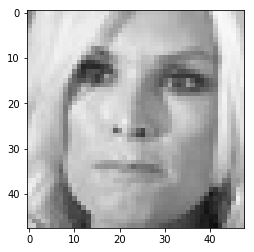

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory="Training/"

In [6]:
Classes =["0","1","2","3","4","5","6"]

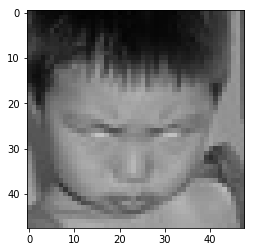

In [7]:
for category in Classes:
    path =os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break   

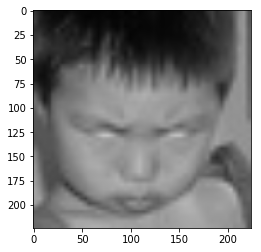

In [8]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_data = []

def create_training_Data():
    for category in Classes:
        path =os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except  Exception as e: 
                pass
    

In [11]:
create_training_Data()

In [12]:
print(len(training_data))

28709


In [13]:
temp=np.array(training_data)

C:\Users\abdel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [14]:
temp.shape

(28709, 2)

In [15]:
import random
random.shuffle(training_data)

In [16]:
x=[]
y=[]
for features ,label in training_data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1,img_size,img_size,3)    

In [17]:
x.shape

(28709, 224, 224, 3)

In [18]:
print("hello")

hello


In [ ]:
x=x/255.0;

In [ ]:
y[0]

In [ ]:
Y=np.array(y)

In [ ]:
Y.shape

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNetV2()

In [ ]:
model.summary()

In [ ]:
base_input=model.layers[0].input

In [ ]:
base_output=model.layers[-2].output

In [ ]:
base_output

In [ ]:
final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Dense('relu')(final_output)
final_output=layers.Dense(7,activation="softmax")(final_output)

In [ ]:
new_model=keras.model(inputs=base_input,outputs=final_output)

In [ ]:
new_model.summary

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
new_model.fit(x,y,epochs=25)

In [ ]:
#evaluate model on new image
frame=cv2.imread("")

In [ ]:
frame.shape

In [ ]:
plt.imshow(cv2.cvColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
#DetectFace
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+ "haar")

In [ ]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

In [ ]:
face=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray =gray[y:y+h , x:x+w]
    roi_Color =frame[y:y+h , x:x+w]
    cv2.rectangle(frame,(x,y),(x+w ,y+h),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("face not detected")
    else:
        for (ex,ey,ew,eh) in facess
        face_roi = roi_color[ey:ey+eh,ex:ex+ew]
    

In [ ]:
plt.imshow(cv2.cvt.Color(frame,cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvt.Color(face_roi,cv2.COLOR_BGR2RGB))

In [ ]:
final_image=cv2.resize(backtorgb,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image=final_image/225.0

In [ ]:
predictions = new_model.predict(final_image)

In [ ]:
np.argmax(predictions)

In [ ]:
import cv2 ### pip install opencv-python
## pip install opencv-contrib-python fullpackage
#from deepface import DeepFace
## pip install deepface
path ="haarcascade frontalface default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
# set the rectangle background to white
rectangle_bgr = (255, 255, 255)
# make a black image
img = np.zeros((500, 500))
# set some text
text="Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y= img.shape[0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset _x + text_width + 2, text_offset_y - text_height-2))
cv2. rectangle(img, box_coords[0], box_coords[1], rectangle_bgr,cv2. FILLED)
cV2. putText(img, text,(text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame =cap.read()
    #eye cascade = cv2. CascadeCLassifier(cv2. data. haarcascades #'haarcascade eye. xmL')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade frontalface default, xml')
    gray = cv2.cvtColor(frame, cv2.COLOR.BGR2GRAY)
    #print (faceCascade. empty () )
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y, w,h in faces:
        roi_gray = gray[y: y+h, x: x+w]
        roi color=frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected" )
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face
    final_image =cv2.resize(face_roi, (224,224))
    final_image=np.expand_dims(final_image, axis =0) ## need fourth dimension
    final_image=final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    font_scale= 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    if (np.argmax(Predictions)==0):
        status="Angry"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0) , -1)
        # Add text
        cv2.putText(frame,status, (x1 + int (w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2. putText (frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE _4)
        cv2. rectangle (frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax(Predictions)==1):
        status ="Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0) , -1)
        # Add text
        cv2.putText (frame, status, (x1 + int (w1/10) ,y1 + int (h1/2)) , cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255) ,2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax(Predictions)==2):
        status ="Fear"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0) , -1)
        # Add text
        cv2.putText (frame, status, (x1 + int (w1/10) ,y1 + int (h1/2)) , cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255) ,2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax(Predictions)==3):
        status ="Happy"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0) , -1)
        # Add text
        cv.putText (frame, status, (x1 + int (w1/10) ,y1 + int (h1/2)) , cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255) ,2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax(Predictions)==4):
        status ="Sad"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0) , -1)
        # Add text
        cv2.putText (frame, status, (x1 + int (w1/10) ,y1 + int (h1/2)) , cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255) ,2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax(Predictions)==5):
        status ="Surprise"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0) , -1)
        # Add text
        cv2.putText (frame, status, (x1 + int (w1/10) ,y1 + int (h1/2)) , cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255) ,2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    else:
        status ="Neutral"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0) , -1)
        # Add text
        cv2.putText (frame, status, (x1 + int (w1/10) ,y1 + int (h1/2)) , cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255) ,2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        
        
                
    cv2.imshow( 'Face Emotion Recognition',frame)
    if cv2.waitKey (2) & 0xFF == ord('q'):
        break
cap.release ()
cv2.destroyAllWindows()
        
        